In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

Unable to revert mtime: /Library/Fonts
Fontconfig warning: ignoring UTF-8: not a valid region tag


In [ ]:
!pip3 install matplotlib geopandas shapely

In [2]:
df = pd.read_csv('../data/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv', parse_dates=['collection_week'])
df.head()

/var/folders/4n/fnm27kds4tsbfbt5m1y08tp80000gq/T/ipykernel_20329/1840837538.py:1: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv', parse_dates=['collection_week'])


,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_7_day_coverage,previous_day_admission_adult_covid_suspected_7_day_coverage,previous_day_admission_pediatric_covid_suspected_7_day_coverage,previous_week_personnel_covid_vaccinated_doses_administered_7_day,total_personnel_covid_vaccinated_doses_none_7_day,total_personnel_covid_vaccinated_doses_one_7_day,total_personnel_covid_vaccinated_doses_all_7_day,previous_week_patients_covid_vaccinated_doses_one_7_day,previous_week_patients_covid_vaccinated_doses_all_7_day,is_corrected
0,28TA03,2022-02-18,NE,28TA03,MADONNA REHABILITATION SPECIALTY HOSPITAL OMAHA,17500 BURKE STREET,OMAHA,68118.0,Long Term,31055.0,...,1,1,1,21.0,78.0,391.0,384.0,0.0,0.0,False
1,301300,2022-02-18,NH,301300,UPPER CONNECTICUT VALLEY HOSPITAL,181 CORLISS LANE,COLEBROOK,3576.0,Critical Access Hospitals,33007.0,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False
2,332006,2022-02-18,NY,332006,CALVARY HOSPITAL INC,1740 - 70 EASTCHESTER R0AD,BRONX,10461.0,Long Term,36005.0,...,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,False
3,362031,2022-02-18,OH,362031,SELECT SPECIALTY HOSPITAL SOUTHEAST OHIO,"200 TAMARACK ROAD, 2ND FLOOR",NEWARK,43055.0,Long Term,39089.0,...,7,7,7,0.0,NaN,NaN,NaN,NaN,NaN,False
4,670010,2022-02-18,TX,670010,MAYHILL HOSPITAL,2809 SOUTH MAYHILL ROAD,DENTON,76208.0,Short Term,48121.0,...,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,False


In [3]:
df_ny = df[df.state=='NY']
len(df_ny), len(df)

(13408, 409797)

In [4]:
len(df_ny.city.unique())

114

In [ ]:
!wget https://raw.githubusercontent.com/thomashikaru/nycvisualization/master/nyc_neighborhoods.geojson

In [6]:
street_map = gpd.read_file('../nyc_neighborhoods.geojson')

<AxesSubplot:>

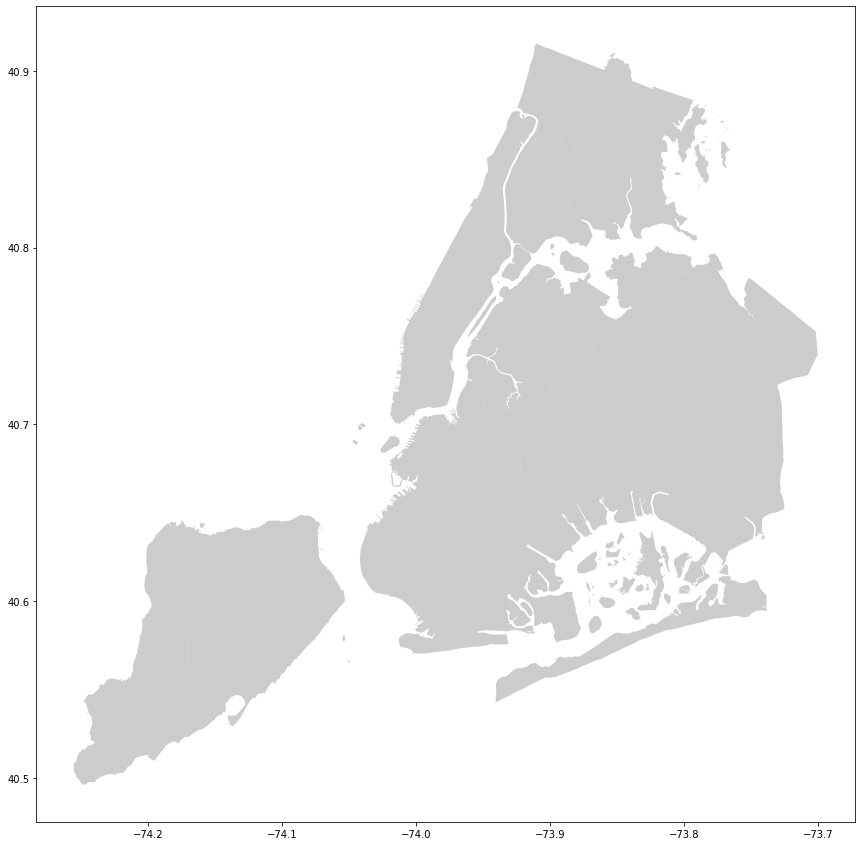

In [10]:
fig,ax = plt.subplots(figsize= (15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')

In [31]:
df_ny.geocoded_hospital_address.head(2)

2                               NaN
138    POINT (-73.671434 42.733395)
Name: geocoded_hospital_address, dtype: object

In [35]:
import re
pattern = re.compile("-?\d{2}\.\d{1,}")
df_ny.dropna(subset=['geocoded_hospital_address'], inplace=True)
df_ny['lng'] = df_ny.geocoded_hospital_address.apply(lambda x: [float(_) for _ in pattern.findall(x)][0])
df_ny['lat'] = df_ny.geocoded_hospital_address.apply(lambda x: [float(_) for _ in pattern.findall(x)][1])
df_ny.head()

/var/folders/4n/fnm27kds4tsbfbt5m1y08tp80000gq/T/ipykernel_20329/2083515049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ny.dropna(subset=['geocoded_hospital_address'], inplace=True)
/var/folders/4n/fnm27kds4tsbfbt5m1y08tp80000gq/T/ipykernel_20329/2083515049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ny['lng'] = df_ny.geocoded_hospital_address.apply(lambda x: [float(_) for _ in pattern.findall(x)][0])
/var/folders/4n/fnm27kds4tsbfbt5m1y08tp80000gq/T/ipykernel_20329/2083515049.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_suspected_7_day_coverage,previous_week_personnel_covid_vaccinated_doses_administered_7_day,total_personnel_covid_vaccinated_doses_none_7_day,total_personnel_covid_vaccinated_doses_one_7_day,total_personnel_covid_vaccinated_doses_all_7_day,previous_week_patients_covid_vaccinated_doses_one_7_day,previous_week_patients_covid_vaccinated_doses_all_7_day,is_corrected,lng,lat
138,330409,2021-04-16,NY,330409,THE BURDETT CARE CENTER,2215 BURDETT AVE,TROY,12180.0,Short Term,36083.0,...,7,0.0,0.0,55.0,55.0,0.0,0.0,False,-73.671434,42.733395
255,330215,2020-10-09,NY,330215,"ROME MEMORIAL HOSPITAL, INC",1500 NORTH JAMES STREET,ROME,13440.0,Short Term,36065.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,False,-75.444138,43.229108
272,331301,2020-10-02,NY,331301,"CUBA MEMORIAL HOSPITAL, INC",140 WEST MAIN STREET,CUBA,14727.0,Critical Access Hospitals,36003.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,False,-78.288139,42.213341
273,330215,2020-10-02,NY,330215,"ROME MEMORIAL HOSPITAL, INC",1500 NORTH JAMES STREET,ROME,13440.0,Short Term,36065.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,False,-75.444138,43.229108
285,331301,2020-09-25,NY,331301,"CUBA MEMORIAL HOSPITAL, INC",140 WEST MAIN STREET,CUBA,14727.0,Critical Access Hospitals,36003.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,False,-78.288139,42.213341


<AxesSubplot:>

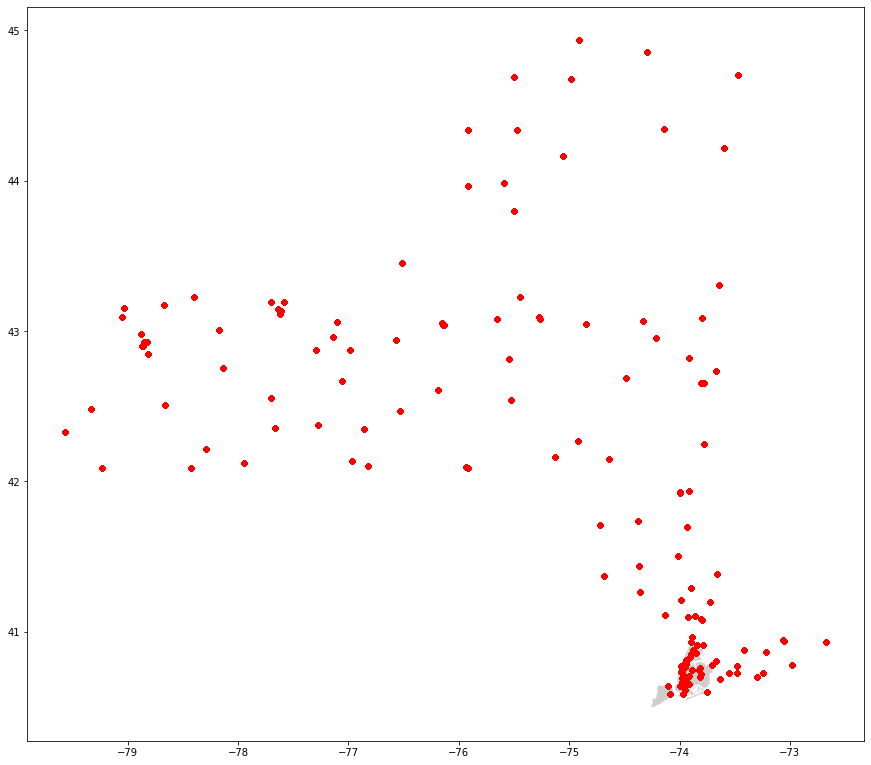

In [64]:
fig,ax = plt.subplots(figsize= (15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(ax = ax, markersize=20, color='red', marker="o")

In [66]:
df_ny.city.unique()

array(['TROY', 'ROME', 'CUBA', 'MEDINA', 'NEWARK', 'GOUVERNEUR',
       'RIVERHEAD', 'WARWICK', 'PORT JERVIS', 'NYACK', 'ONEIDA', 'ELMIRA',
       'WEST ISLIP', 'CORTLANDT MANOR', 'ELIZABETHTOWN', 'NEW YORK',
       'BROOKLYN', 'POUGHKEEPSIE', 'LEWISTON', 'OGDENSBURG', 'WELLSVILLE',
       'WARSAW', 'ELLENVILLE', 'NEW ROCHELLE', 'ROCHESTER',
       'NIAGARA FALLS', 'MANHASSET', 'HARRIS', 'GENEVA', 'BRONX', 'UTICA',
       'MIDDLETOWN', 'DANSVILLE', 'DELHI', 'CORTLAND', 'COBLESKILL',
       'HUNTINGTON', 'ROCKVILLE CENTRE', 'GLOVERSVILLE', 'CORNING',
       'SYRACUSE', 'FLUSHING', 'JAMAICA', 'NEW HARTFD', 'ALEXANDRIA BAY',
       'KINGSTON', 'BATH', 'BATAVIA', 'YONKERS', 'ALBANY', 'EAST MEADOW',
       'AUBURN', 'BUFFALO', 'PORT JEFFERSON', 'STATEN ISLAND',
       'WESTFIELD', 'SPRINGVILLE', 'ITHACA', 'LOCKPORT', 'STAR LAKE',
       'NORWICH', 'MASSENA', 'MALONE', 'NEWBURGH', 'SCHENECTADY',
       'PATCHOGUE', 'AMSTERDAM', 'CANANDAIGUA', 'MOUNT VERNON',
       'LITTLE FALLS', 'WALTON', 

In [65]:
!wget https://download.geofabrik.de/north-america/us/new-york-latest-free.shp.zip

--2022-03-02 19:03:47--  https://download.geofabrik.de/north-america/us/new-york-latest-free.shp.zip
Resolving download.geofabrik.de (download.geofabrik.de)... 95.216.28.113, 116.202.112.212
Connecting to download.geofabrik.de (download.geofabrik.de)|95.216.28.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 608786335 (581M) [application/zip]
Saving to: ‘new-york-latest-free.shp.zip’

new-york-latest-fre 100%[===================>] 580.58M  3.92MB/s    in 2m 15s  

2022-03-02 19:06:03 (4.31 MB/s) - ‘new-york-latest-free.shp.zip’ saved [608786335/608786335]



In [67]:
street_map = gpd.read_file('../NYS_Civil_Boundaries.shp.zip',)
print(street_map)

          NAME MUNI_TYPE  MUNITYCODE       COUNTY GNIS_ID   FIPS_CODE    SWIS  \
0        Adams      town           2    Jefferson  978655  3604500210  222000   
1      Addison      town           2      Steuben  978656  3610100287  462000   
2        Afton      town           2     Chenango  978657  3601700353  082000   
3      Alabama      town           2      Genesee  978658  3603700474  182000   
4       Albany      city           1       Albany  978659  3600101000  010100   
..         ...       ...         ...          ...     ...         ...     ...   
990      Yates      town           2      Orleans  979659  3607383448  343800   
991    Yonkers      city           1  Westchester  979660  3611984000  551800   
992       York      town           2   Livingston  979661  3605184022  245200   
993  Yorkshire      town           2  Cattaraugus  979662  3600984055  048400   
994   Yorktown      town           2  Westchester  979663  3611984077  555400   

     POP1990  POP2000  POP2

/usr/local/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

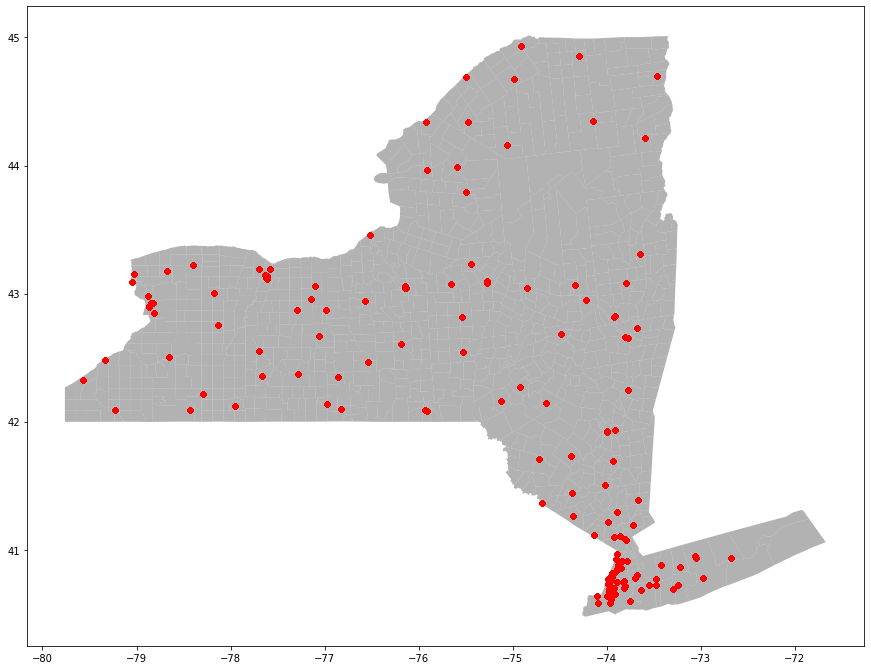

In [72]:
fig,ax = plt.subplots(figsize= (15,15))
x = street_map.to_crs(crs)
x.plot(ax=ax, alpha=0.6, color='grey')
geo_df.plot(ax = ax, markersize=20, color='red', marker="o")

In [73]:
street_map.head()

,NAME,MUNI_TYPE,MUNITYCODE,COUNTY,GNIS_ID,FIPS_CODE,SWIS,POP1990,POP2000,POP2010,POP2020,DOS_LL,DOSLL_DATE,MAP_SYMBOL,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area,geometry
0,Adams,town,2,Jefferson,978655,3604500210,222000,4977,4782,5143,4973,None,None,T,42.361757,2018-11-06,41971.838963,1.097164e+08,"POLYGON ((419711.937 4860894.762, 420725.148 4..."
1,Addison,town,2,Steuben,978656,3610100287,462000,2645,2640,2595,2397,None,None,T,25.777686,2018-03-01,33582.894334,6.676390e+07,"POLYGON ((311738.502 4672651.742, 312215.800 4..."
2,Afton,town,2,Chenango,978657,3601700353,082000,2972,2977,2851,2769,None,None,T,46.677247,2017-09-01,56181.056904,1.208935e+08,"POLYGON ((457510.038 4679307.408, 457514.525 4..."
3,Alabama,town,2,Genesee,978658,3603700474,182000,1998,1881,1869,1602,None,None,T,52.236298,2018-02-12,48055.772466,1.352914e+08,"POLYGON ((223125.570 4780997.861, 224223.622 4..."
4,Albany,city,1,Albany,978659,3600101000,010100,101082,95658,97856,99224,None,None,1,21.990002,2017-11-10,52588.062435,5.695384e+07,"POLYGON ((594045.717 4729421.064, 594243.246 4..."


In [74]:
density = street_map['POP2010']/street_map['Shape_Area']
density.head()

0    0.000047
1    0.000039
2    0.000024
3    0.000014
4    0.001718
dtype: float64